# Homework Part II: Random variates from arbitrary distribution

In [20]:
from functools import partial
import numpy
from matplotlib import pyplot
import scipy.stats
import numpy as np

[-1.6284459   1.49601817  0.42446775 ... -0.70839962  0.87294655
  1.45591929]
[ 0.11105994  1.51744078 -0.13497392 ...  1.22128121 -0.55651536
  0.24669253]


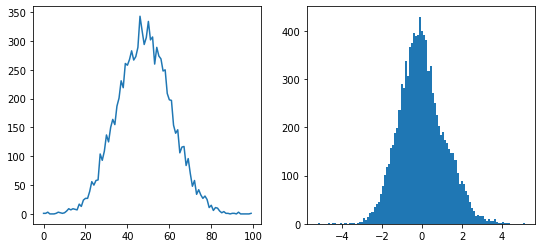

In [31]:
def generate(A,N,R):
# Generate a random sample array using previous function
    x_samples = scipy.stats.norm.rvs(size=N, loc=A, scale=R, random_state=123)
    print(x_samples)
    
# Define a PDF
    PDF = numpy.empty(x_samples.shape)
    PDF[x_samples < 0] = numpy.round(x_samples[x_samples < 0] + 3.5) / 3
    PDF[x_samples >= 0] = 0.5 * numpy.cos(numpy.pi * x_samples[x_samples >= 0]) + 0.5
    PDF /= numpy.sum(PDF)
    
# Calculate approximated CDF
    CDF = numpy.empty(PDF.shape)
    cumulated = 0
    for i in range(CDF.shape[0]):
        cumulated += PDF[i]
        CDF[i] = cumulated
        
# Generate samples, x is the generated sample
    generate = partial(numpy.interp, xp=CDF, fp=x_samples)
    u_rv = numpy.random.random(10000)
    x = generate(u_rv)
    print(x)
    
# Plot input data and out put data to see if they matches
    fig, (ax0, ax1) = pyplot.subplots(ncols=2, figsize=(9, 4))
    hist = np.histogram(x_samples, bins=100)
    ax0.plot(hist[0], label='histogram')
    ax1.hist(x, 100)
    pyplot.show()
    
generate(0,10000,1.5)

### Left: original histogram data  &nbsp;&nbsp;    Right: generated data based on original
